<a href="https://colab.research.google.com/github/OptimizationExpert/Pyomo/blob/main/vertex_rectangle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Developed by Alireza Soroudi
alireza.soroudi@gmail.com

Linkedin News letter : https://www.linkedin.com/newsletters/optimization-in-open-source-6874020019009859585/

Git hub: https://github.com/OptimizationExpert/Pyomo



In [1]:
!pip install ortools
from ortools.sat.python import cp_model # CP-SAT solver
import numpy as np
from random import randint
import random
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt # Data visualization
from matplotlib.patches import Rectangle


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.6.2 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 5.26.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.2

-------------------------
-------------------------
-------------------------
-------------------------
-------------------------
Status = OPTIMAL
Number of solutions found: 5


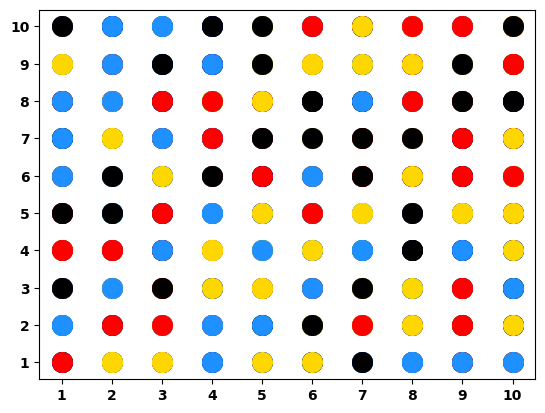

In [3]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""
    def __init__(self, variables,points):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0
        self.__dic = points
    def on_solution_callback(self):
        self.__solution_count += 1
        print('-------------------------')
        KOLOR= ['r','dodgerblue','g','k','gold','navy']
        random.shuffle(KOLOR)
        for (p,c) in self.__variables:
            if self.Value(self.__variables[p,c]) >0:
                [i,j] = self.__dic[p]
                plt.scatter(i,j , c=KOLOR[c-1], s=200)
        maxi= max([self.__dic[p][0] for p in self.__dic ])
        maxj= max([self.__dic[p][1] for p in self.__dic ])
        plt.xticks(range(1,maxi+1),fontweight='bold')
        plt.yticks(range(1,maxj+1),fontweight='bold')
        plt.savefig(f'Vertex_{maxi}_{maxj}.png', format='png', dpi=500)


    def solution_count(self):
        return self.__solution_count
def SearchForAllSolutionsSampleSat(N,M,C):

    # Creates the model.
    model = cp_model.CpModel()

    # Creates the variables.
    rows = range(1,N+1)
    cols = range(1,M+1)
    colors = range(1,1+C)

    points = {}
    counter = 0
    for i in rows:
        for j in cols:
            counter+=1
            points[counter] = [i,j]


    x = {(p,c):model.NewBoolVar(f"x_{p}_{c}") for p in points for c in colors}


    for p in points:
        model.AddExactlyOne([x[p,c] for c in colors])
    dic= {(points[p][0],points[p][1]):p for p in points}


    keep = []
    for p1 in points:
        for p2 in points:
            [i,j] =points[p1]
            [m,n] =points[p2]
            if p1!=p2 and m<i and n<j:
                keep.append([dic[m,n], dic[m,j] ,dic[i,n] , dic[i,j]])
            elif p1!=p2 and m>i and n>j:
                keep.append([dic[i,j],dic[i,n],dic[m,j] ,dic[m,n]])

    for c in colors:
        for K in keep:
            expression = [x[p,c] for p in K]
            model.Add(sum(expression) <= 3)

    lb= sum(c*x[dic[1,col],c] for c in colors for col in cols)
    rb= sum(c*x[dic[N,col],c] for c in colors for col in cols)
    ul= sum(c*x[dic[r,M],c] for c in colors for r in rows)
    ur= sum(c*x[dic[r,1],c] for c in colors for r in rows)

    model.Add(lb<=rb)
    model.Add(ul<=ur)
    model.Add(ul+ur <= lb+rb)

    # Create a solver and solve.
    solver = cp_model.CpSolver()
    solution_printer = VarArraySolutionPrinter(x,points)
    # Enumerate all solutions.
    solver.parameters.enumerate_all_solutions = False
    solver.parameters.num_search_workers = 16



    # Solve.
    status = solver.Solve(model, solution_printer)

    print(f"Status = {solver.StatusName(status)}")
    print(f"Number of solutions found: {solution_printer.solution_count()}")

SearchForAllSolutionsSampleSat(10,10,4)